Технический анализ изучает движения цены финансовых инструментов и объем их торгов. На основании прошлых данных технические аналитики прогнозируют будущее движение цен с помощью разных инструментов: индикаторов, графических фигур и др.

Как правило, технический анализ применяют для трейдинга и краткосрочных вложений. Фундаментальный анализ применяют долгосрочные инвесторы, которые могут игнорировать краткосрочные колебания цены.

In [146]:
import pandas as pd 
import numpy as np
import yfinance as yf
from pylab import plt, mpl

# Предварительный технический анализ для котировок акций

In [113]:
tickers = ['^GDAXI', 'MBG.DE', 'PUM.DE', 'BAYN.DE', 'PAH3.DE', 'HEN3.DE']
lst = []
for tick in tickers:
  data = yf.download(tick,'2021-01-01','2022-01-01')["Adj Close"].values
  lst.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [114]:
arr = np.array(lst)
df = pd.DataFrame(arr.T)
df.columns = tickers
df.head(5)

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
0,13726.740234,51.724777,90.166565,45.964359,53.227642,87.799614
1,13651.219727,51.715687,89.002235,46.136875,53.171040,85.497604
2,13891.969727,51.297523,89.239052,47.959969,52.737064,86.220551
3,13968.240234,52.533829,87.068260,48.789921,53.133301,86.011269
4,14049.530273,52.442917,87.423477,48.025249,52.548382,87.076668


In [115]:
# добавим даты 
sd = yf.download('PUM.DE','2021-01-01','2022-01-01')
data_ind = sd.index.tolist()

df.index = list(data_ind)
df

[*********************100%***********************]  1 of 1 completed


,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
2021-01-04,13726.740234,51.724777,90.166565,45.964359,53.227642,87.799614
2021-01-05,13651.219727,51.715687,89.002235,46.136875,53.171040,85.497604
2021-01-06,13891.969727,51.297523,89.239052,47.959969,52.737064,86.220551
2021-01-07,13968.240234,52.533829,87.068260,48.789921,53.133301,86.011269
2021-01-08,14049.530273,52.442917,87.423477,48.025249,52.548382,87.076668
...,...,...,...,...,...,...
2021-12-23,15756.309570,64.867195,104.387749,45.142487,81.689400,68.476357
2021-12-27,15835.250000,64.682098,104.437180,45.592701,81.612083,68.883492
2021-12-28,15963.700195,64.413712,105.573982,45.650795,81.844040,69.484505
2021-12-29,15852.250000,63.145802,105.821114,45.457153,80.858208,69.445724


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ^GDAXI   255 non-null    float64
 1   MBG.DE   255 non-null    float64
 2   PUM.DE   255 non-null    float64
 3   BAYN.DE  255 non-null    float64
 4   PAH3.DE  255 non-null    float64
 5   HEN3.DE  255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


Графики финансовых временных рядов:

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

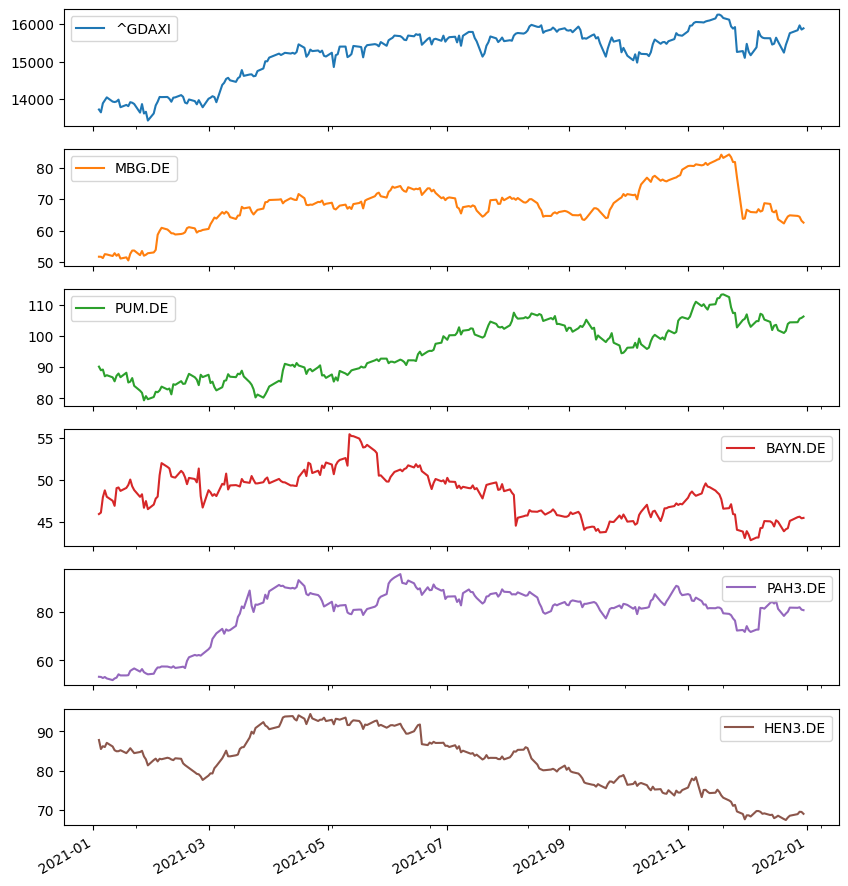

In [117]:
df.plot(figsize = (10,12), subplots = True)

# Сводная статистика 

In [118]:
df.describe().round(2)     

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
count,255.00,255.00,255.00,255.00,255.00,255.00
mean,15209.81,67.67,95.78,48.32,79.27,82.31
std,700.00,7.16,8.83,2.67,11.13,7.38
min,13432.87,50.54,79.35,42.85,51.87,67.39
25%,15008.48,64.67,87.69,45.96,78.42,76.61
50%,15453.56,67.73,96.28,48.79,82.66,83.12
75%,15691.36,70.97,103.40,50.13,86.79,87.13
max,16251.13,84.19,113.38,55.48,95.47,94.44


In [119]:
df.mean() 

^GDAXI     15209.806962
MBG.DE        67.674531
PUM.DE        95.776044
BAYN.DE       48.320693
PAH3.DE       79.274407
HEN3.DE       82.312323
dtype: float64

In [120]:
df.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
min,13432.87,50.54,79.35,42.85,51.87,67.39
mean,15209.81,67.67,95.78,48.32,79.27,82.31
std,700.00,7.16,8.83,2.67,11.13,7.38
median,15453.56,67.73,96.28,48.79,82.66,83.12
max,16251.13,84.19,113.38,55.48,95.47,94.44


# Вычисление изменений, накапливаемых во временном ряду:

1. Абсолютная разность 

In [121]:
df.diff().mean()

^GDAXI     8.496536
MBG.DE     0.042633
PUM.DE     0.063383
BAYN.DE   -0.001806
PAH3.DE    0.107945
HEN3.DE   -0.074168
dtype: float64

2. процентные изменения

In [122]:
df.pct_change().mean()

^GDAXI     0.000616
MBG.DE     0.000960
PUM.DE     0.000757
BAYN.DE    0.000084
PAH3.DE    0.001869
HEN3.DE   -0.000892
dtype: float64

<Axes: >

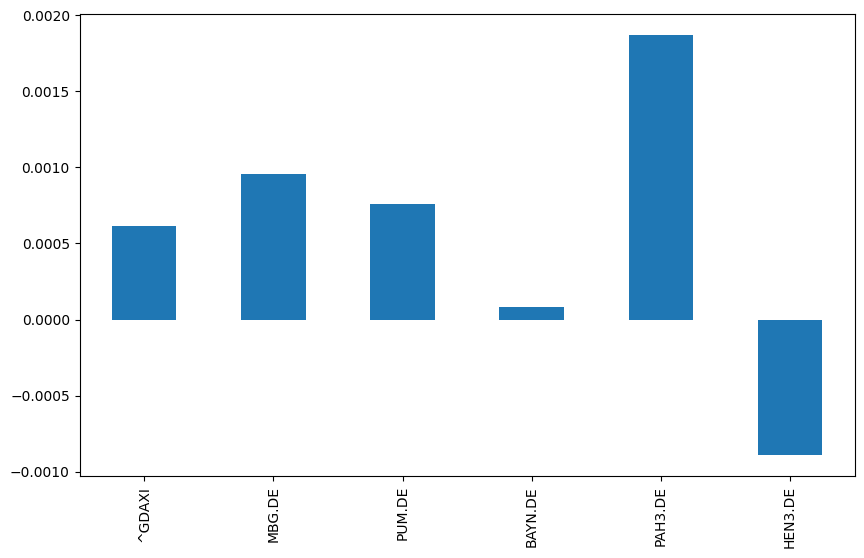

In [123]:
df.pct_change().mean().plot(kind = 'bar', figsize = (10,6))

Видим, что Henkel AG & Co (HEN3.DE) показывает отрицательный рост, что было видно и на графике выше. Акции компании убыточны для исследуемого периода.

3. логарифмическая доходность (векторизированным способом)

In [126]:
log_mu = np.log(df/df.shift(1))
log_mu.head().round(3)

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,-0.006,-0.000,-0.013,0.004,-0.001,-0.027
2021-01-06,0.017,-0.008,0.003,0.039,-0.008,0.008
2021-01-07,0.005,0.024,-0.025,0.017,0.007,-0.002
2021-01-08,0.006,-0.002,0.004,-0.016,-0.011,0.012


<Axes: >

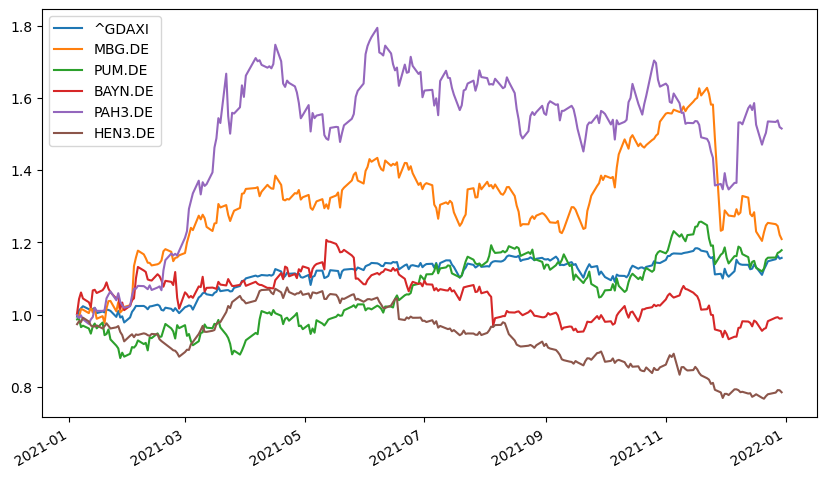

In [127]:
log_mu.cumsum().apply(np.exp).plot(figsize = (10,6))

# Прореживание данных 

In [128]:
df.resample('1w', label = 'right').last().head()  # недельные интервалы

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
2021-01-10,14049.530273,52.442917,87.423477,48.025249,52.548382,87.076668
2021-01-17,13787.730469,51.142982,86.772255,48.724644,53.793694,85.193199
2021-01-24,13873.969727,53.697407,84.009430,48.827221,56.661682,84.451233
2021-01-31,13432.870117,52.833813,79.707321,46.547188,54.246532,81.331161
2021-02-07,14056.719727,60.897057,83.752876,52.035122,57.473022,82.891197


In [129]:
df.resample('1m', label = 'right').last().head()  # месячные интервалы

,^GDAXI,MBG.DE,PUM.DE,BAYN.DE,PAH3.DE,HEN3.DE
2021-01-31,13432.870117,52.833813,79.707321,46.547188,54.246532,81.331161
2021-02-28,13786.290039,60.224365,86.811714,46.738354,62.624084,77.602303
2021-03-31,15008.339844,69.096664,82.430672,50.319267,85.303856,91.186028
2021-04-30,15135.910156,68.532120,86.555168,52.108711,82.624550,92.633072
2021-05-31,15421.129883,70.494141,92.742981,49.843117,87.266159,90.946373


<Axes: >

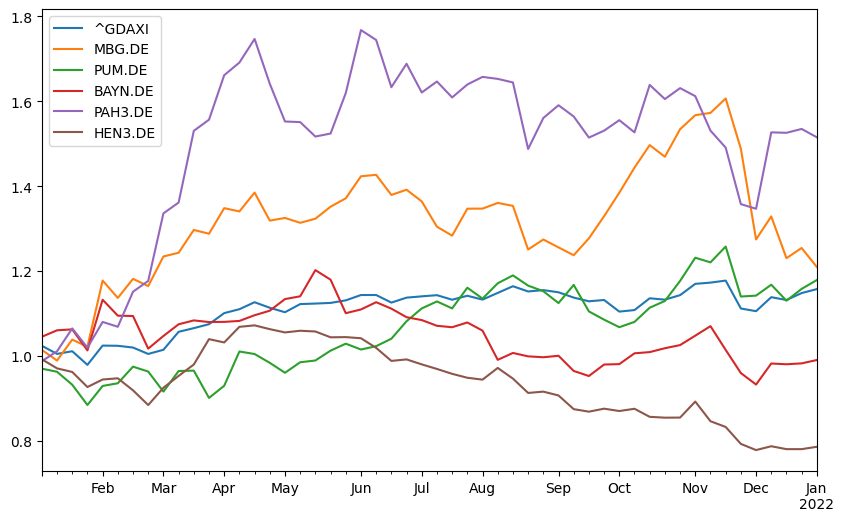

In [131]:
log_mu.cumsum().apply(np.exp).resample('1w', label = 'right').last().plot(figsize=(10,6))

# Индикаторы

Индикаторы в техническом анализе — это инструменты, математические функции, построенные но основе торговых данных (например, цены, объемов торгов и т.д.). Опираясь на их анализ, трейдер принимает решение о покупке или продаже активов.


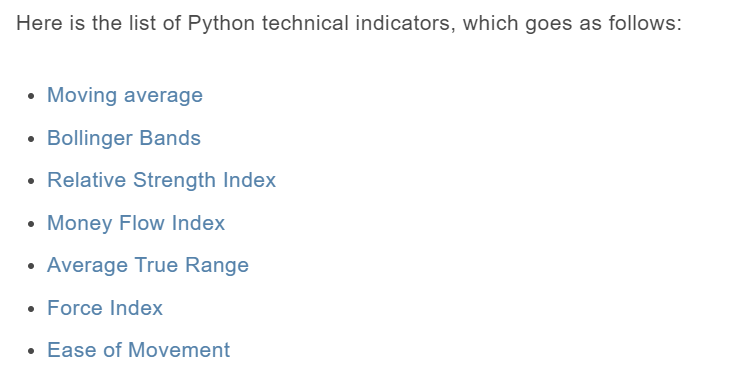

In [143]:
comp = 'MBG.DE'

In [135]:
data = pd.DataFrame(df[comp]).dropna()
data.head()

,MBG.DE
2021-01-04,51.724777
2021-01-05,51.715687
2021-01-06,51.297523
2021-01-07,52.533829
2021-01-08,52.442917


In [136]:
window = 20

data['min'] = df[comp].rolling(window = window).min()
data['mean'] = df[comp].rolling(window = window).mean()
data['std'] = df[comp].rolling(window = window).std()
data['median'] = df[comp].rolling(window = window).median()
data['max'] = df[comp].rolling(window = window).max()

# экспоненциально взвешенное скользящее среднее 
# с полупериодом затухания 0.5:
data['ewma'] = df[comp].ewm(halflife = 0.5, min_periods = window).mean()

data.dropna().head()                             

,MBG.DE,min,mean,std,median,max,ewma
2021-01-29,52.833813,50.543011,52.263839,0.832017,52.283838,53.697407,52.713541
2021-02-01,53.079254,50.543011,52.331563,0.840908,52.397467,53.697407,52.987826
2021-02-02,53.888306,50.543011,52.440194,0.895707,52.488373,53.888306,53.663186
2021-02-03,58.688072,50.543011,52.809722,1.626148,52.542917,58.688072,57.431851
2021-02-04,59.906200,50.543011,53.178340,2.268887,52.597458,59.906200,59.287613


<Axes: >

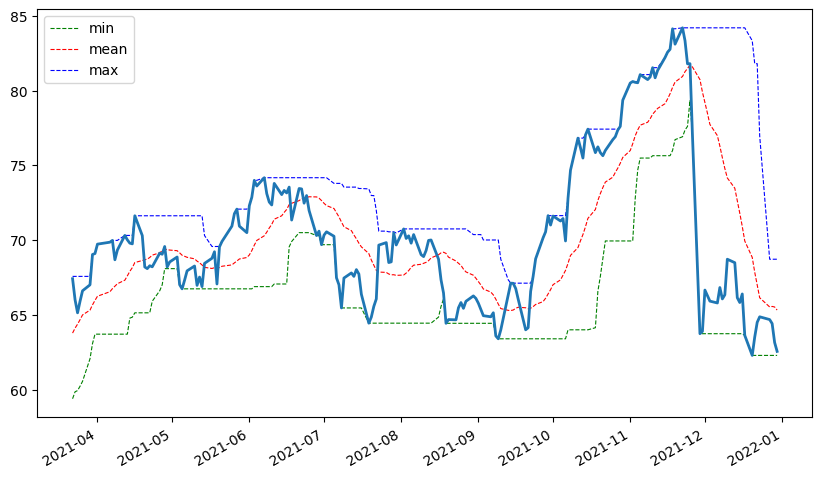

In [137]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize = (10,6), 
                                                   style = ['g--', 'r--', 'b--'],
                                                   lw = 0.8)

df[comp].iloc[-200:].plot(ax = ax, lw = 2.0)

# Вычисление двух простых скользящих средних

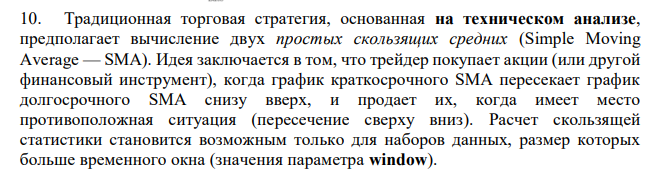

In [138]:
data['SMA1'] = df[comp].rolling(window = 42).mean() # краткосрочный SMA 
data['SMA2'] = df[comp].rolling(window = 255).mean() # долгосрочный SMA 

In [139]:
data[[comp, 'SMA1', 'SMA2']].dropna()

,MBG.DE,SMA1,SMA2
2021-12-27,64.682098,73.782765,67.725764
2021-12-28,64.413712,73.468762,67.776117
2021-12-29,63.145802,73.082923,67.821474
2021-12-30,62.553486,72.655658,67.866141


Визуализация котировок и временных рядов SMA показывает, что вычисление
скользящего среднего начинается тогда, когда набирается достаточное количество
наблюдений (с учётом параметров):

<Axes: >

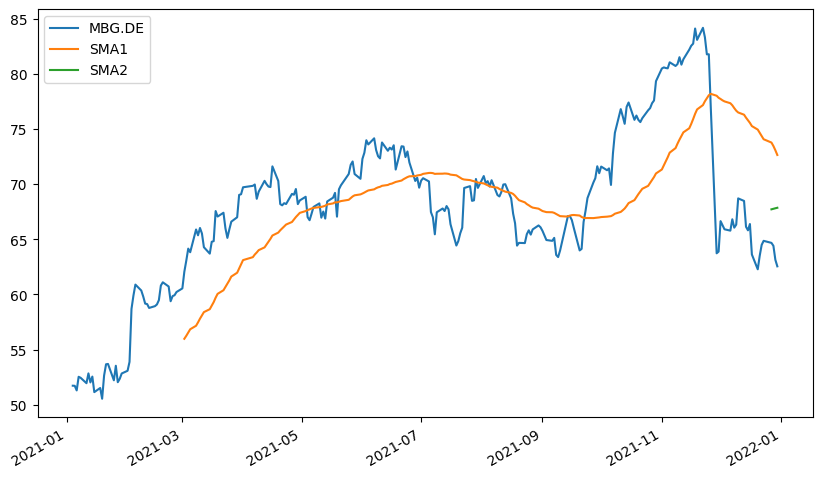

In [140]:
data[[comp, 'SMA1', 'SMA2']].plot(figsize = (10,6))

Если краткосрочное SMA больше долгосрочного SMA, то нужно открывать
длинную позицию (уровень 1). В противном случае следует открывать короткую
позицию (уровень -1): 

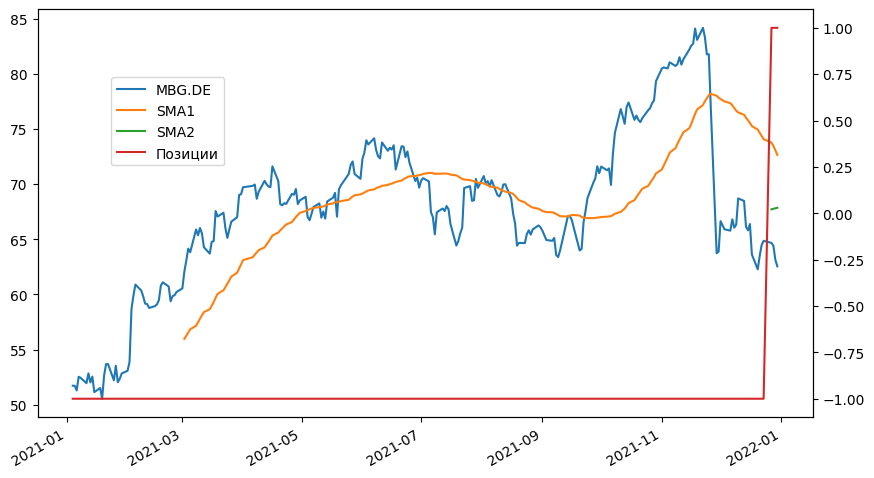

In [142]:
data['Позиции'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

ax = data[[comp, 'SMA1', 'SMA2', 'Позиции']].plot(figsize = (10,6), 
                                                      secondary_y = 'Позиции', 
                                                      mark_right = False)
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

Исследуя акции компании  Mercedes-Benz Group AG (MBG.DE) приходим к выводу, что трейдеру следует открывать длинную позицию

# Данные по MBG для индикаторов:

In [164]:
data = yf.download('MBG.DE', '2021-01-01','2022-01-01')

[*********************100%***********************]  1 of 1 completed


# Bollinger Bands 

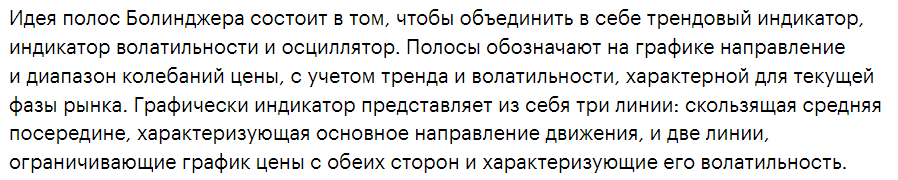

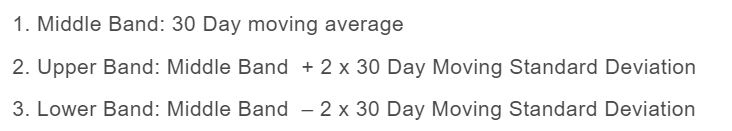

In [165]:
def BBANDS(data, window = n):
    MA = data.Close.rolling(window = n).mean()
    SD = data.Close.rolling(window = n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data

In [166]:
n = 20
BBANDS = BBANDS(data, n)

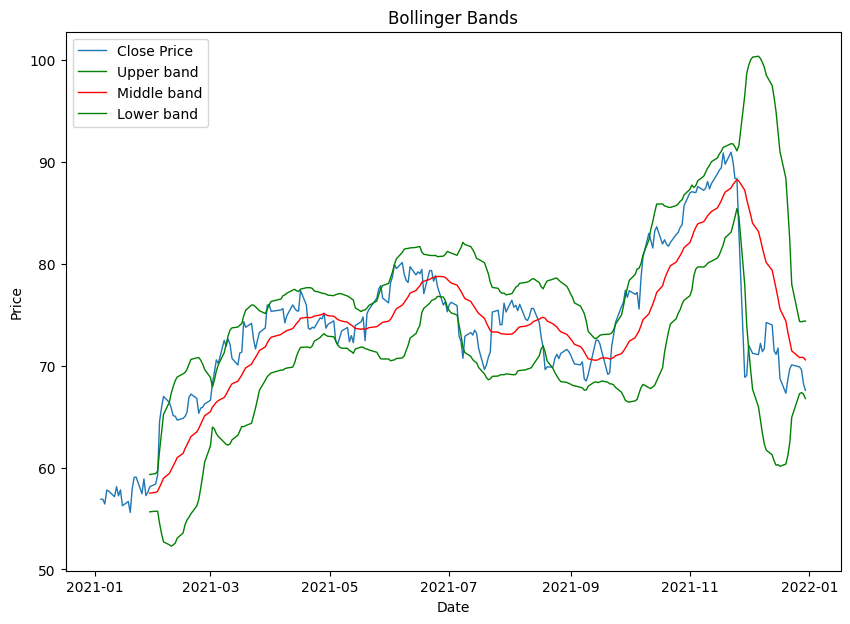

In [167]:
# визуализация: 
plt.figure(figsize = (10,7))

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(BBANDS.Close, lw=1, label='Close Price')
plt.plot(data['UpperBand'],'g',lw=1, label='Upper band')
plt.plot(data['MiddleBand'],'r',lw=1, label='Middle band')
plt.plot(data['LowerBand'],'g', lw=1, label='Lower band')
plt.legend()

plt.show()

Как показано на графике выше, когда цены постоянно пересекают верхнюю полосу, актив обычно находится в состоянии перекупленности, и наоборот, когда цены регулярно пересекают нижнюю полосу, актив обычно находится в состоянии перепроданности.

# Relative Strength Index (индекс относительной силы) 

Отношение среднего прироста цены к среднему падению за период 

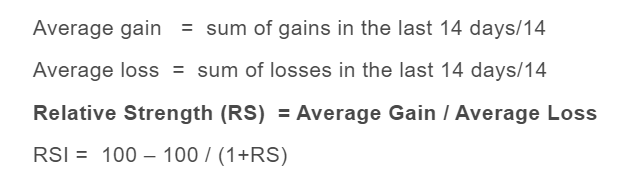

In [168]:
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [169]:
data['RSI'] = rsi(data['Close'])

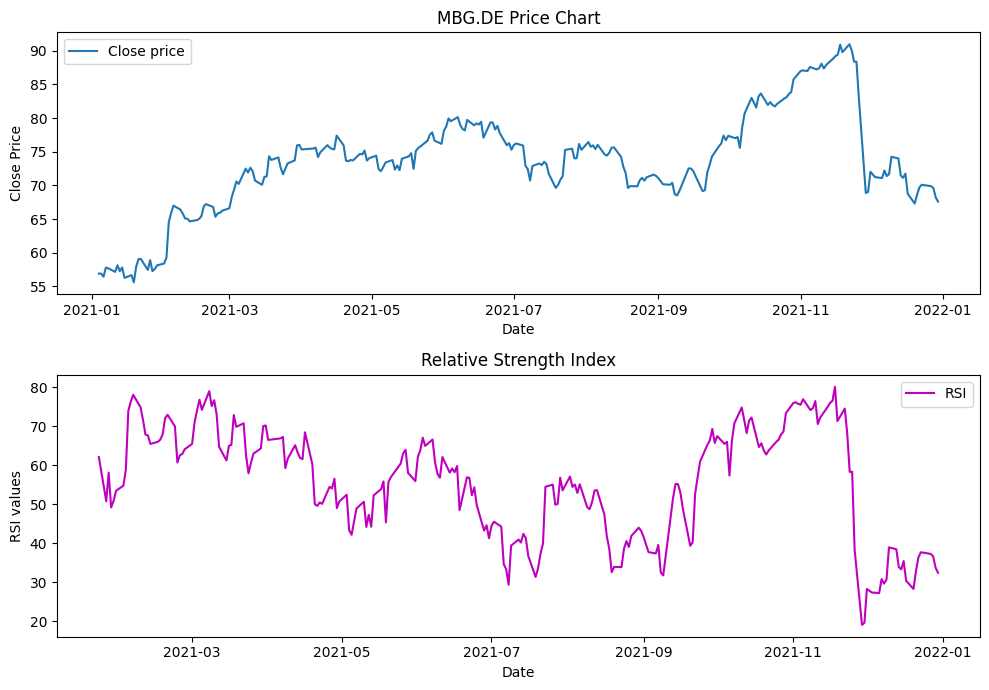

In [170]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(2, 1, 1)    # 1 слой
plt.title('MBG.DE Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data['Close'], label='Close price')
plt.legend()

bx = fig.add_subplot(2, 1, 2)    # 2 слой 

plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')
plt.plot(data['RSI'], 'm', label='RSI')
plt.legend()

plt.tight_layout()
plt.show()

Всякий раз, когда RSI показывает, что линия опускается ниже 30, график RSI указывает на условия перепроданности, а выше 70 график указывает на условия перекупленности.

# Money Flow Index (индекс денежного потока)

Технический индикатор призванный продемонстрировать интенсивность, с которой деньги вкладываются в ценную бумагу и выводятся из неё анализируя объёмы торгов и соотношения типичных цен периодов

In [171]:
def gain(x):
    return ((x > 0) * x).sum()

def loss(x):
    return ((x < 0) * x).sum()


def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()

In [172]:
data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)

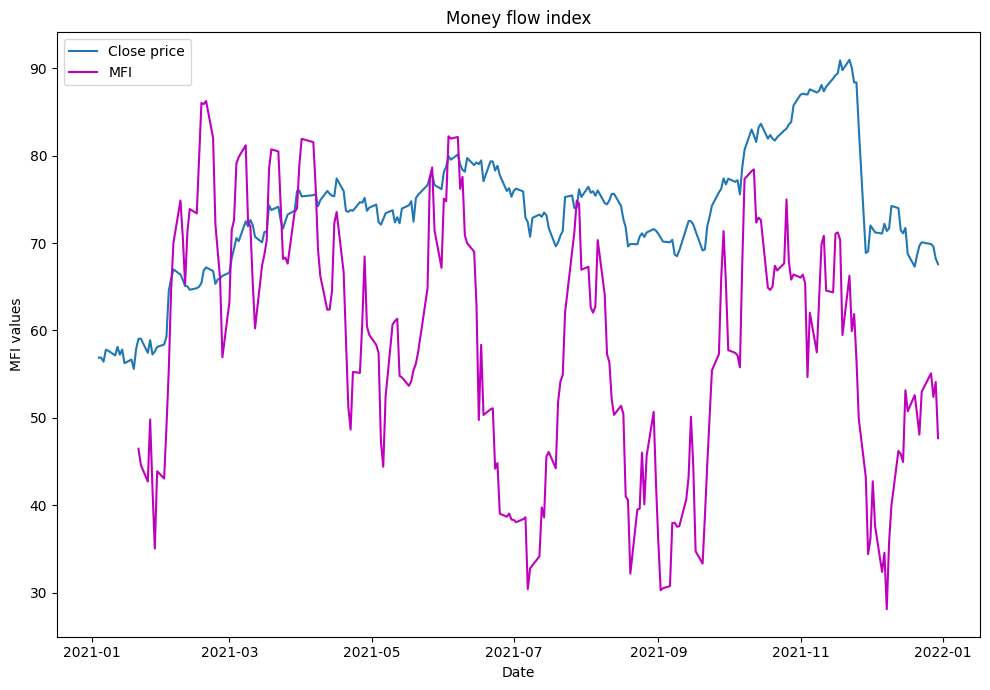

In [173]:
ig = plt.figure(figsize = (10, 7))

ax = fig.add_subplot(2, 1, 1)

plt.title('MBG.DE Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data['Close'], label='Close price')
plt.legend()

bx = fig.add_subplot(2, 1, 2)

plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')
plt.plot(data['MFI'], 'm', label='MFI')

plt.legend()
plt.tight_layout()
plt.show()

Уровни перепроданности встречаются ниже 20, а уровни перекупленности обычно выше 80. Эти уровни могут меняться в зависимости от рыночных условий. Линии уровня должны пересекать самые высокие пики и самые низкие впадины.
Если базовая цена делает новый максимум или минимум, который не подтверждается MFI, это расхождение может сигнализировать о развороте цены.

# Average True Range (средний истинный диапазон)

Он показывает волатильность, и может сказать о текущем состоянии тренда и активности на рынке.

In [174]:
def atr(high, low, close, n=14):
    tr = np.amax(np.vstack(((high - low).to_numpy(), (abs(high - close)).to_numpy(), (abs(low - close)).to_numpy())).T, axis=1)
    return pd.Series(tr).rolling(n).mean().to_numpy()

In [175]:
data['ATR'] = atr(data['High'], data['Low'], data['Close'], 14)

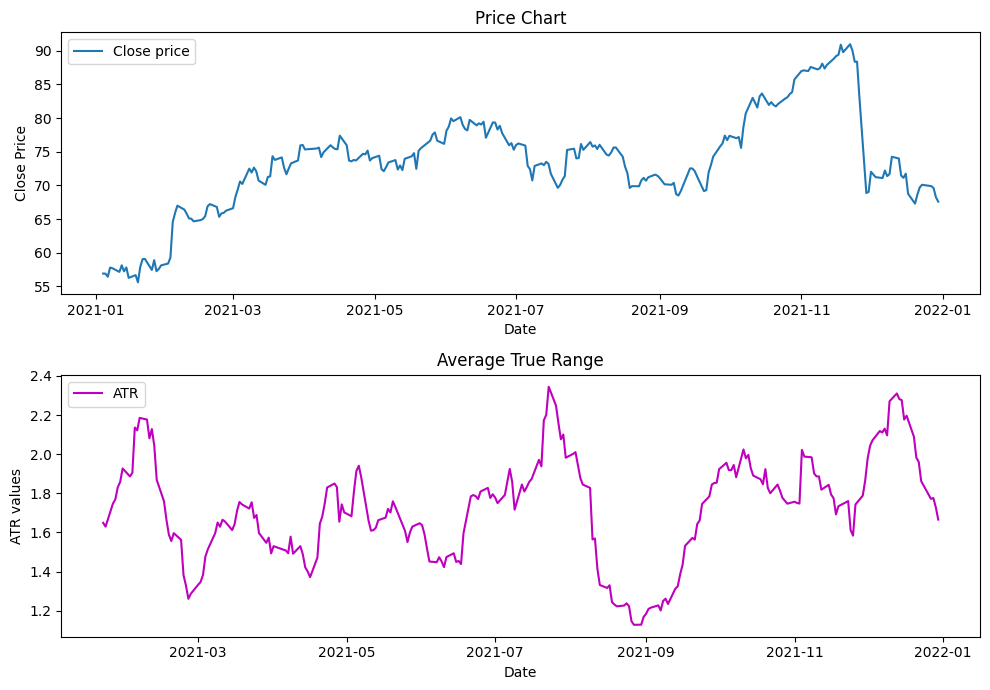

In [176]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(2, 1, 1)   #1-ый

plt.title('Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')
plt.legend()

bx = fig.add_subplot(2, 1, 2)  #2-ой

plt.title('Average True Range')
plt.xlabel('Date')
plt.ylabel('ATR values')

plt.plot(data['ATR'] , 'm', label='ATR')
plt.legend()

plt.tight_layout()
plt.show()

# Force Index (индикатор силы Эдлера)

Эффективный осциллятор, с помощью которого определяют силу покупателей/продавцов в периоды подъема/спада ценового движения.

In [177]:
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data

In [181]:
n = 1
FI = ForceIndex(data,n)
FI['ForceIndex']

Date
2021-01-04             NaN
2021-01-05   -2.660122e+04
2021-01-06   -1.805937e+06
2021-01-07    4.799458e+06
2021-01-08   -3.133338e+05
                  ...     
2021-12-23    6.480897e+05
2021-12-27   -2.486118e+05
2021-12-28   -4.334765e+05
2021-12-29   -3.384045e+06
2021-12-30   -1.432322e+06
Name: ForceIndex, Length: 255, dtype: float64

Если нынешняя цена закрытия превысила вчерашнюю, значит – сила положительная (этот день выиграли покупатели-«быки»). Когда показатель ниже, она – отрицательная (победили продавцы-«медведи»). Объем отражает степень вовлеченности игроков. От его величины напрямую зависит вероятность продолжения тренда. Чем значительнее различие цен и больше объем, тем мощнее сила.

In [185]:
print('выиграли медведи:', FI[FI['ForceIndex']>0].shape[0], '\n',
      'выиграли быки', FI[FI['ForceIndex']<0].shape[0])

выиграли медведи: 139 
 выиграли быки 115
